# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？ 
(2) 影響外遇的原因是什麼？ 
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三次         
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

# 1. import data

In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [8]:
df = pd.read_csv('Affairs.csv')
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,12,female,32.0,10.0,yes,3,17,5,2
1,12,male,37.0,15.0,yes,4,14,5,2
2,12,female,42.0,15.0,yes,5,9,4,1
3,12,male,37.0,10.0,yes,2,20,6,2
4,12,female,32.0,15.0,yes,3,14,1,2


### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [9]:
df['affairs'] = df['affairs'].where(df['affairs'] == 0, 1)
df['children'] = df['children'].replace({'yes': 1, 'no': 0})
df['gender'] = df['gender'].replace({'male': 1, 'female': 0})
df

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,1,0,32.0,10.0,1,3,17,5,2
1,1,1,37.0,15.0,1,4,14,5,2
2,1,0,42.0,15.0,1,5,9,4,1
3,1,1,37.0,10.0,1,2,20,6,2
4,1,0,32.0,15.0,1,3,14,1,2
...,...,...,...,...,...,...,...,...,...
596,0,0,22.0,1.5,0,2,16,4,5
597,0,1,47.0,15.0,0,4,14,5,4
598,0,1,37.0,10.0,1,2,18,6,2
599,0,1,37.0,15.0,1,3,17,5,4


## 1-1 Restart the session

In [10]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

## 1-2 Import relevant libraries

In [1]:
#Standard libraries for data analysis:  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sns # For creating plots
sns.set_style('darkgrid')

In [2]:
#sklearn modules for Model Evaluation & Improvement:   
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [3]:
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()

import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [5]:
#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    int64  
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    int64  
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 42.4 KB


### <span style="color:#3498DB">Point: 請就下列敘述性統計進行分析</span>

In [27]:
df.describe()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.249584,0.475874,32.487521,8.177696,0.715474,3.116473,16.166389,4.194676,3.931780
std,0.433133,0.499834,9.288762,5.571303,0.451564,1.167509,2.402555,1.819443,1.103179
min,0.000000,0.000000,17.500000,0.125000,0.000000,1.000000,9.000000,1.000000,1.000000
25%,0.000000,0.000000,27.000000,4.000000,0.000000,2.000000,14.000000,3.000000,3.000000
50%,0.000000,0.000000,32.000000,7.000000,1.000000,3.000000,16.000000,5.000000,4.000000
75%,0.000000,1.000000,37.000000,15.000000,1.000000,4.000000,18.000000,6.000000,5.000000
max,1.000000,1.000000,57.000000,15.000000,1.000000,5.000000,20.000000,7.000000,5.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# X, y 拆分 ;  指定自變數 X 與目標變數 y
X = df[['gender', 'age', 'yearsmarried', 'children', 'religiousness', 'education', 'occupation', 'rating']]
y = df['affairs']

# Scaling all the variables to a range of 0 to 1
# 特徵標準化 (Scaling)

from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# train test split ; 拆分資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 建立模型
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
y_test_pred_log = model.predict(X_test)

print (metrics.accuracy_score(y_test, y_test_pred_log))

# 預測機率
probability = model.predict_proba(X_test)[:,1]  # P(affairs=1)

0.768595041322314


Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

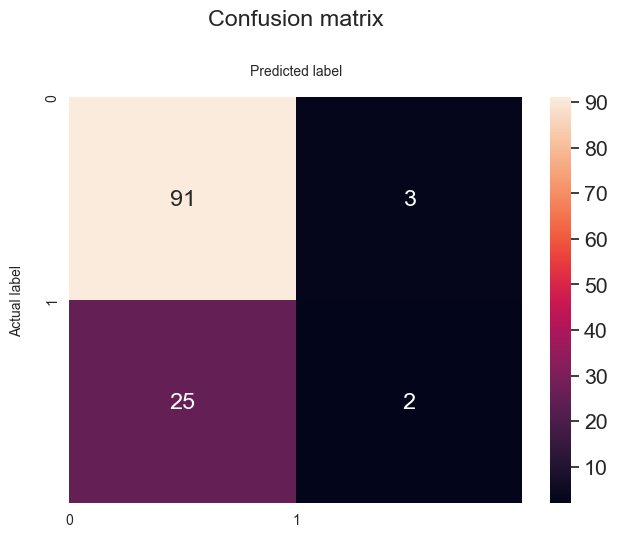

In [13]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_log) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')


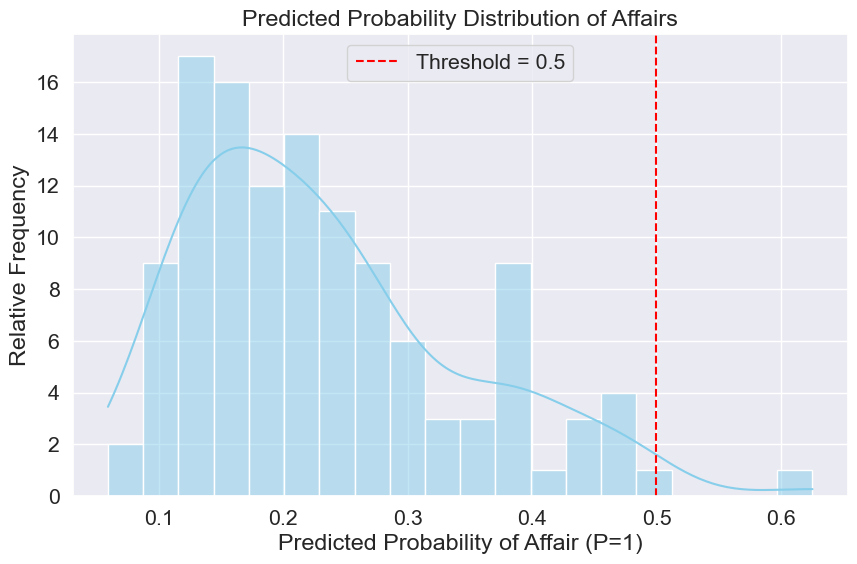

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# probability 是你上一段 model.predict_proba(X_test)[:,1] 得到的機率值
# 確保 probability 已經存在

plt.figure(figsize=(10,6))

# 繪製預測機率的分布圖
sns.histplot(probability, bins=20, kde=True, color='skyblue')

# 畫出常用的臨界值線（例如 0.5）
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')

# 標題與座標軸標籤
plt.title('Predicted Probability Distribution of Affairs')
plt.xlabel('Predicted Probability of Affair (P=1)')
plt.ylabel('Relative Frequency')

# 顯示圖例
plt.legend()

# 顯示圖形
plt.show()


In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, probability)
J_scores = tpr - fpr
best_threshold = thresholds[J_scores.argmax()]
print("最佳 threshold =", best_threshold)


最佳 threshold = 0.24954564055364598


使用新閾值 0.2495 後的準確率: 0.6281


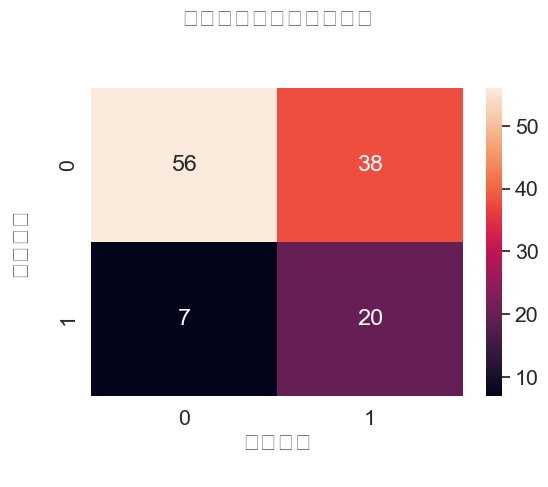


使用新閾值後的分類報告：
              precision    recall  f1-score   support

     無外遇 (0)       0.89      0.60      0.71        94
     有外遇 (1)       0.34      0.74      0.47        27

    accuracy                           0.63       121
   macro avg       0.62      0.67      0.59       121
weighted avg       0.77      0.63      0.66       121



In [ ]:
# 1. 取得模型預測屬於類別 1 (有外遇) 的機率
probability = model.predict_proba(X_test)[:,1]

# 2. 設定您找到的最佳閾值
best_threshold = 0.24954564055364598

# 3. 根據新的閾值，手動產生最終的預測結果
#    如果機率 >= best_threshold，則預測為 1，否則為 0
y_pred_new = (probability >= best_threshold).astype(int)

# --- 接下來，使用新的預測結果 y_pred_new 來重新評估模型 ---

# 4. 重新計算準確率
new_accuracy = metrics.accuracy_score(y_test, y_pred_new)
print(f"使用新閾值 {best_threshold:.4f} 後的準確率: {new_accuracy:.4f}")

# 5. 重新繪製混淆矩陣
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_new = confusion_matrix(y_test, y_pred_new)
df_cm_new = pd.DataFrame(cm_new, index=(0, 1), columns=(0, 1))

plt.figure(figsize=(6, 4))
sns.set(font_scale=1.4)
sns.heatmap(df_cm_new, annot=True, fmt='g')
plt.title('Mixing matrix after using the new threshold\n', y=1.1)
plt.ylabel('real label\n')
plt.xlabel('Predicted labels\n')
plt.show()

# 6. (強烈建議) 輸出完整的分類報告，觀察 Precision 和 Recall 的變化
from sklearn.metrics import classification_report
print("\n使用新閾值後的分類報告：")
print(classification_report(y_test, y_pred_new, target_names=['無外遇 (0)', '有外遇 (1)']))